# **🏦 PROJET** : Analyse de l'Attrition Clientèle dans le Secteur Bancaire : Comprendre et Prédire le Désengagement Client**

# **I. Introduction** :
Dans le paysage bancaire concurrentiel actuel, la fidélisation des clients est devenue cruciale pour une croissance durable. L'attrition client, ou le taux auquel les clients mettent fin à leur relation avec une banque, représente un défi majeur pour les institutions financières mondiales. Les études montrent que l'acquisition d'un nouveau client peut coûter cinq à neuf fois plus que la fidélisation d'un client existant, faisant de la prévention de l'attrition un impératif commercial critique.

# **II. Contexte Sectoriel du Churn Bancaire**

**1.** **Tendances Globales du Secteur Bancaire**

Le secteur bancaire traverse une période de transformation majeure caractérisée par une volatilité croissante de la clientèle. Le taux d'attrition moyen dans le secteur bancaire se situe entre 20% et 25%, représentant un défi majeur pour les institutions financières (Bain & Company Banking Report 2023).

Les études montrent qu'un client fidélisé devient significativement plus rentable avec le temps, avec une augmentation moyenne de la rentabilité de 20% à 40% après deux ans de relation (McKinsey Global Banking Review 2023).

**2.** **Transformation Digitale et Nouveaux Comportements**

La digitalisation a profondément modifié le paysage bancaire :
- 71% des clients utilisent désormais principalement les services bancaires numériques (Capgemini World Retail Banking Report 2023)
- Plus de 80% des interactions bancaires sont réalisées via les canaux digitaux (Boston Consulting Group Banking Report 2023)
- Les néobanques capturent entre 7% et 15% des nouveaux clients dans les marchés développés (EY Global Banking Outlook 2023)

**3. Impact Post-Pandémique**

La pandémie a accéléré les transformations du secteur :
- L'adoption des services bancaires digitaux a augmenté de 45% (World Retail Banking Report 2023, Capgemini)
- 65% des clients préfèrent désormais les interactions à distance avec leur banque (PwC Banking Survey 2023)
- L'utilisation des applications bancaires mobiles a connu une hausse de 35% (J.D. Power Banking Mobile App Satisfaction Study 2023)

**4. Comportements Clients et Fidélisation**

Les comportements clients ont significativement évolué :
- 38% des clients entretiennent des relations avec plusieurs banques (Forrester Banking Customer Experience Index 2023)
- Les clients de la génération millennial changent de banque 2,5 fois plus souvent que les autres générations (Gallup Banking Industry Study 2023)
- 46% des changements de banque sont motivés par les frais bancaires (Accenture Global Banking Consumer Study 2023)

**5. Aspects Économiques de la Rétention**

L'importance économique de la rétention client est soulignée par plusieurs indicateurs :
- L'acquisition d'un nouveau client coûte 5 à 9 fois plus cher que la rétention d'un client existant (Harvard Business Review, "The Value of Keeping the Right Customers")
- Les banques consacrent entre 25% et 35% de leur budget marketing à la rétention client (Gartner Financial Services Marketing Survey 2023)

**6. Attentes en Matière de Service**

Les attentes des clients ont considérablement augmenté :
- 82% des clients attendent une expérience omnicanale fluide (Oracle Banking Experience Survey 2023)
- La qualité du service client influence directement 82% des décisions de changement de banque (KPMG Banking Report 2023)

Cette évolution rapide du secteur bancaire souligne l'importance cruciale d'une analyse approfondie des facteurs de churn pour développer des stratégies de rétention efficaces.

# **III. Aperçu de l'Étude Actuelle** :

Cette analyse se concentre sur un jeu de données bancaires contenant des informations détaillées sur les caractéristiques des clients et leur statut de rétention. Le dataset comprend {len(df)} clients et se compose des attributs suivants :

**1. Identifiants et Informations de Base :**
- RowNumber : Numéro de ligne
- CustomerId : Identifiant unique du client
- Surname : Nom de famille du client

**2. Facteurs Démographiques :**
- Age : Âge du client
- Gender : Genre du client
- Geography : Pays du client (France, Allemagne, Espagne)

**3. Indicateurs de Relation Bancaire :**
- Tenure : Durée de la relation client (en années)
- NumOfProducts : Nombre de produits bancaires détenus
- HasCrCard : Possession d'une carte de crédit (1=Oui, 0=Non)
- IsActiveMember : Statut d'activité du compte (1=Actif, 0=Inactif)

**4. Métriques Financières :**
- CreditScore : Score de crédit du client
- Balance : Solde du compte
- EstimatedSalary : Salaire estimé du client

**5. Variable Cible :**
- Exited : Indicateur de churn (1=Client parti, 0=Client fidèle)

**6. Points clés du dataset**
- Portée géographique : 3 pays européens
- Mélange de variables catégorielles et numériques
- Combinaison d'informations personnelles, comportementales et financières
- Focus sur la prédiction du churn via une classification binaire

Cette structure de données permet une analyse approfondie des facteurs influençant la décision des clients de quitter la banque, en prenant en compte aussi bien les aspects démographiques que comportementaux et financiers.

# **IV. Objectifs de l'Analyse :**

- Identifier les facteurs clés contribuant à l'attrition client
- Profiler les segments clients à haut risque
- Analyser les variations géographiques des schémas d'attrition
- Comprendre la relation entre les caractéristiques clients et la probabilité d'attrition
- Fournir des insights actionnables pour les stratégies de rétention

Cette analyse approfondie aidera à développer des stratégies de rétention ciblées et à améliorer la satisfaction client tout en réduisant les taux d'attrition. Les sections suivantes détaillent nos découvertes à travers diverses approches analytiques et visualisations.

**1. Installation de quelques bibliothèques python qui serviront à notre analyse**

In [17]:
!pip install pandas numpy scikit-learn matplotlib seaborn lifelines xgboost lightgbm catboost shap yellowbrick imbalanced-learn

**2. importation des bibliotheques qui nous serviront dans le cadre de notre analyse**

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import io
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

**3. Importation du dataset de données**

In [23]:
from google.colab import files
uploaded = files.upload()
filename = list(uploaded.keys())[0]  # Get the actual filename from the uploaded dictionary
df = pd.read_csv(io.BytesIO(uploaded[filename]))  # Use the correct filename to access the file content
df

Saving Churn_Modelling.csv to Churn_Modelling (4).csv


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


**4. Informations concernant le dataset**

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**5. vérification des valeurs nulles dans le dataset**

In [25]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


**6. verification des doublons dans le dataset**

In [26]:
df[df.duplicated()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited


**7. Exploration et Profilage des Données Clients**
**Métriques Clés, Segmentation et Analyse des Risques**

In [48]:
descriptive_stats = {
        'total_customers': len(df),
        'churn_rate': (df['Exited'].mean() * 100),
        'average_age': df['Age'].mean(),
        'average_balance': df['Balance'].mean(),
        'average_credit_score': df['CreditScore'].mean()
    }


segments = {
        'churn_by_gender': df.groupby('Gender')['Exited'].mean() * 100,
        'churn_par_products': df.groupby('NumOfProducts')['Exited'].mean() * 100
    }


numerical_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
correlations = df[numerical_cols + ['Exited']].corr()['Exited']


df['RiskScore'] = (
        (df['Balance'] > df['Balance'].mean()) * 1 +
        (df['Age'] > 50) * 1 +
        (df['IsActiveMember'] == 0) * 1 +
        (df['NumOfProducts'] == 1) * 1
    )

risk_analysis = {
        'clients_risque_eleve': len(df[df['RiskScore'] >= 3]),
        'taux_churn_risque_eleve': df[df['RiskScore'] >= 3]['Exited'].mean() * 100
    }

# Affichage des statistiques générales
print("📊 Statistiques Générales")
print("-" * 50)
print(f"Nombre total de clients : {descriptive_stats['total_customers']:,}")
print(f"Taux de churn global : {descriptive_stats['churn_rate']:.2f}%")
print(f"Âge moyen : {descriptive_stats['average_age']:.1f} ans")
print(f"Solde moyen : {descriptive_stats['average_balance']:,.2f} €")
print(f"Score de crédit moyen : {descriptive_stats['average_credit_score']:.1f}")

print("\n📈 Analyse par Segment")
print("-" * 50)
print("\nTaux de churn par genre :")
print(segments['churn_by_gender'])

print("\nTaux de churn par nombre de produits :")
print(segments['churn_par_products'])

print("\n🔗 Corrélations avec le Churn")
print("-" * 50)
for col in numerical_cols:
    print(f"{col}: {correlations[col]:.3f}")

print("\n⚠️ Analyse des Risques")
print("-" * 50)
print(f"Nombre de clients à haut risque : {risk_analysis['clients_risque_eleve']:,}")
print(f"Taux de churn des clients à haut risque : {risk_analysis['taux_churn_risque_eleve']:.2f}%")

📊 Statistiques Générales
--------------------------------------------------
Nombre total de clients : 10,000
Taux de churn global : 20.37%
Âge moyen : 38.9 ans
Solde moyen : 76,485.89 €
Score de crédit moyen : 650.5

📈 Analyse par Segment
--------------------------------------------------

Taux de churn par genre :
Gender
Female    25.071539
Male      16.455928
Name: Exited, dtype: float64

Taux de churn par nombre de produits :
NumOfProducts
1     27.714398
2      7.581699
3     82.706767
4    100.000000
Name: Exited, dtype: float64

🔗 Corrélations avec le Churn
--------------------------------------------------
CreditScore: -0.027
Age: 0.285
Tenure: -0.014
Balance: 0.119
NumOfProducts: -0.048
EstimatedSalary: 0.012

⚠️ Analyse des Risques
--------------------------------------------------
Nombre de clients à haut risque : 2,422
Taux de churn des clients à haut risque : 37.08%


### **8. Analyse Visuelle du Churn Bancaire, Distribution, Segmentation et Analyses Avancées**

🔍 **Première Partie : Indicateurs Fondamentaux**
- Distribution générale du churn (Pie Chart)
- Analyse géographique des taux de churn
- Distribution de l'âge par statut client
- Distribution des soldes par statut client
- Relation Credit Score vs Age
- Analyse par nombre de produits
- Analyse par genre
- Matrice de corrélation des variables numériques

📈 **Deuxième Partie : Analyses Avancées**
- Impact du statut de membre actif
- Segmentation par groupes d'âge
- Segmentation par niveau de solde
- Distribution de l'ancienneté client

📋 **Éléments Statistiques**
- Taux de churn global
- Âge moyen des clients perdus
- Solde moyen des clients perdus
- Taux de churn par région

---




<ipython-input-39-c4a3c38b067b>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Exited', y='Age',
<ipython-input-39-c4a3c38b067b>:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Exited', y='Balance',


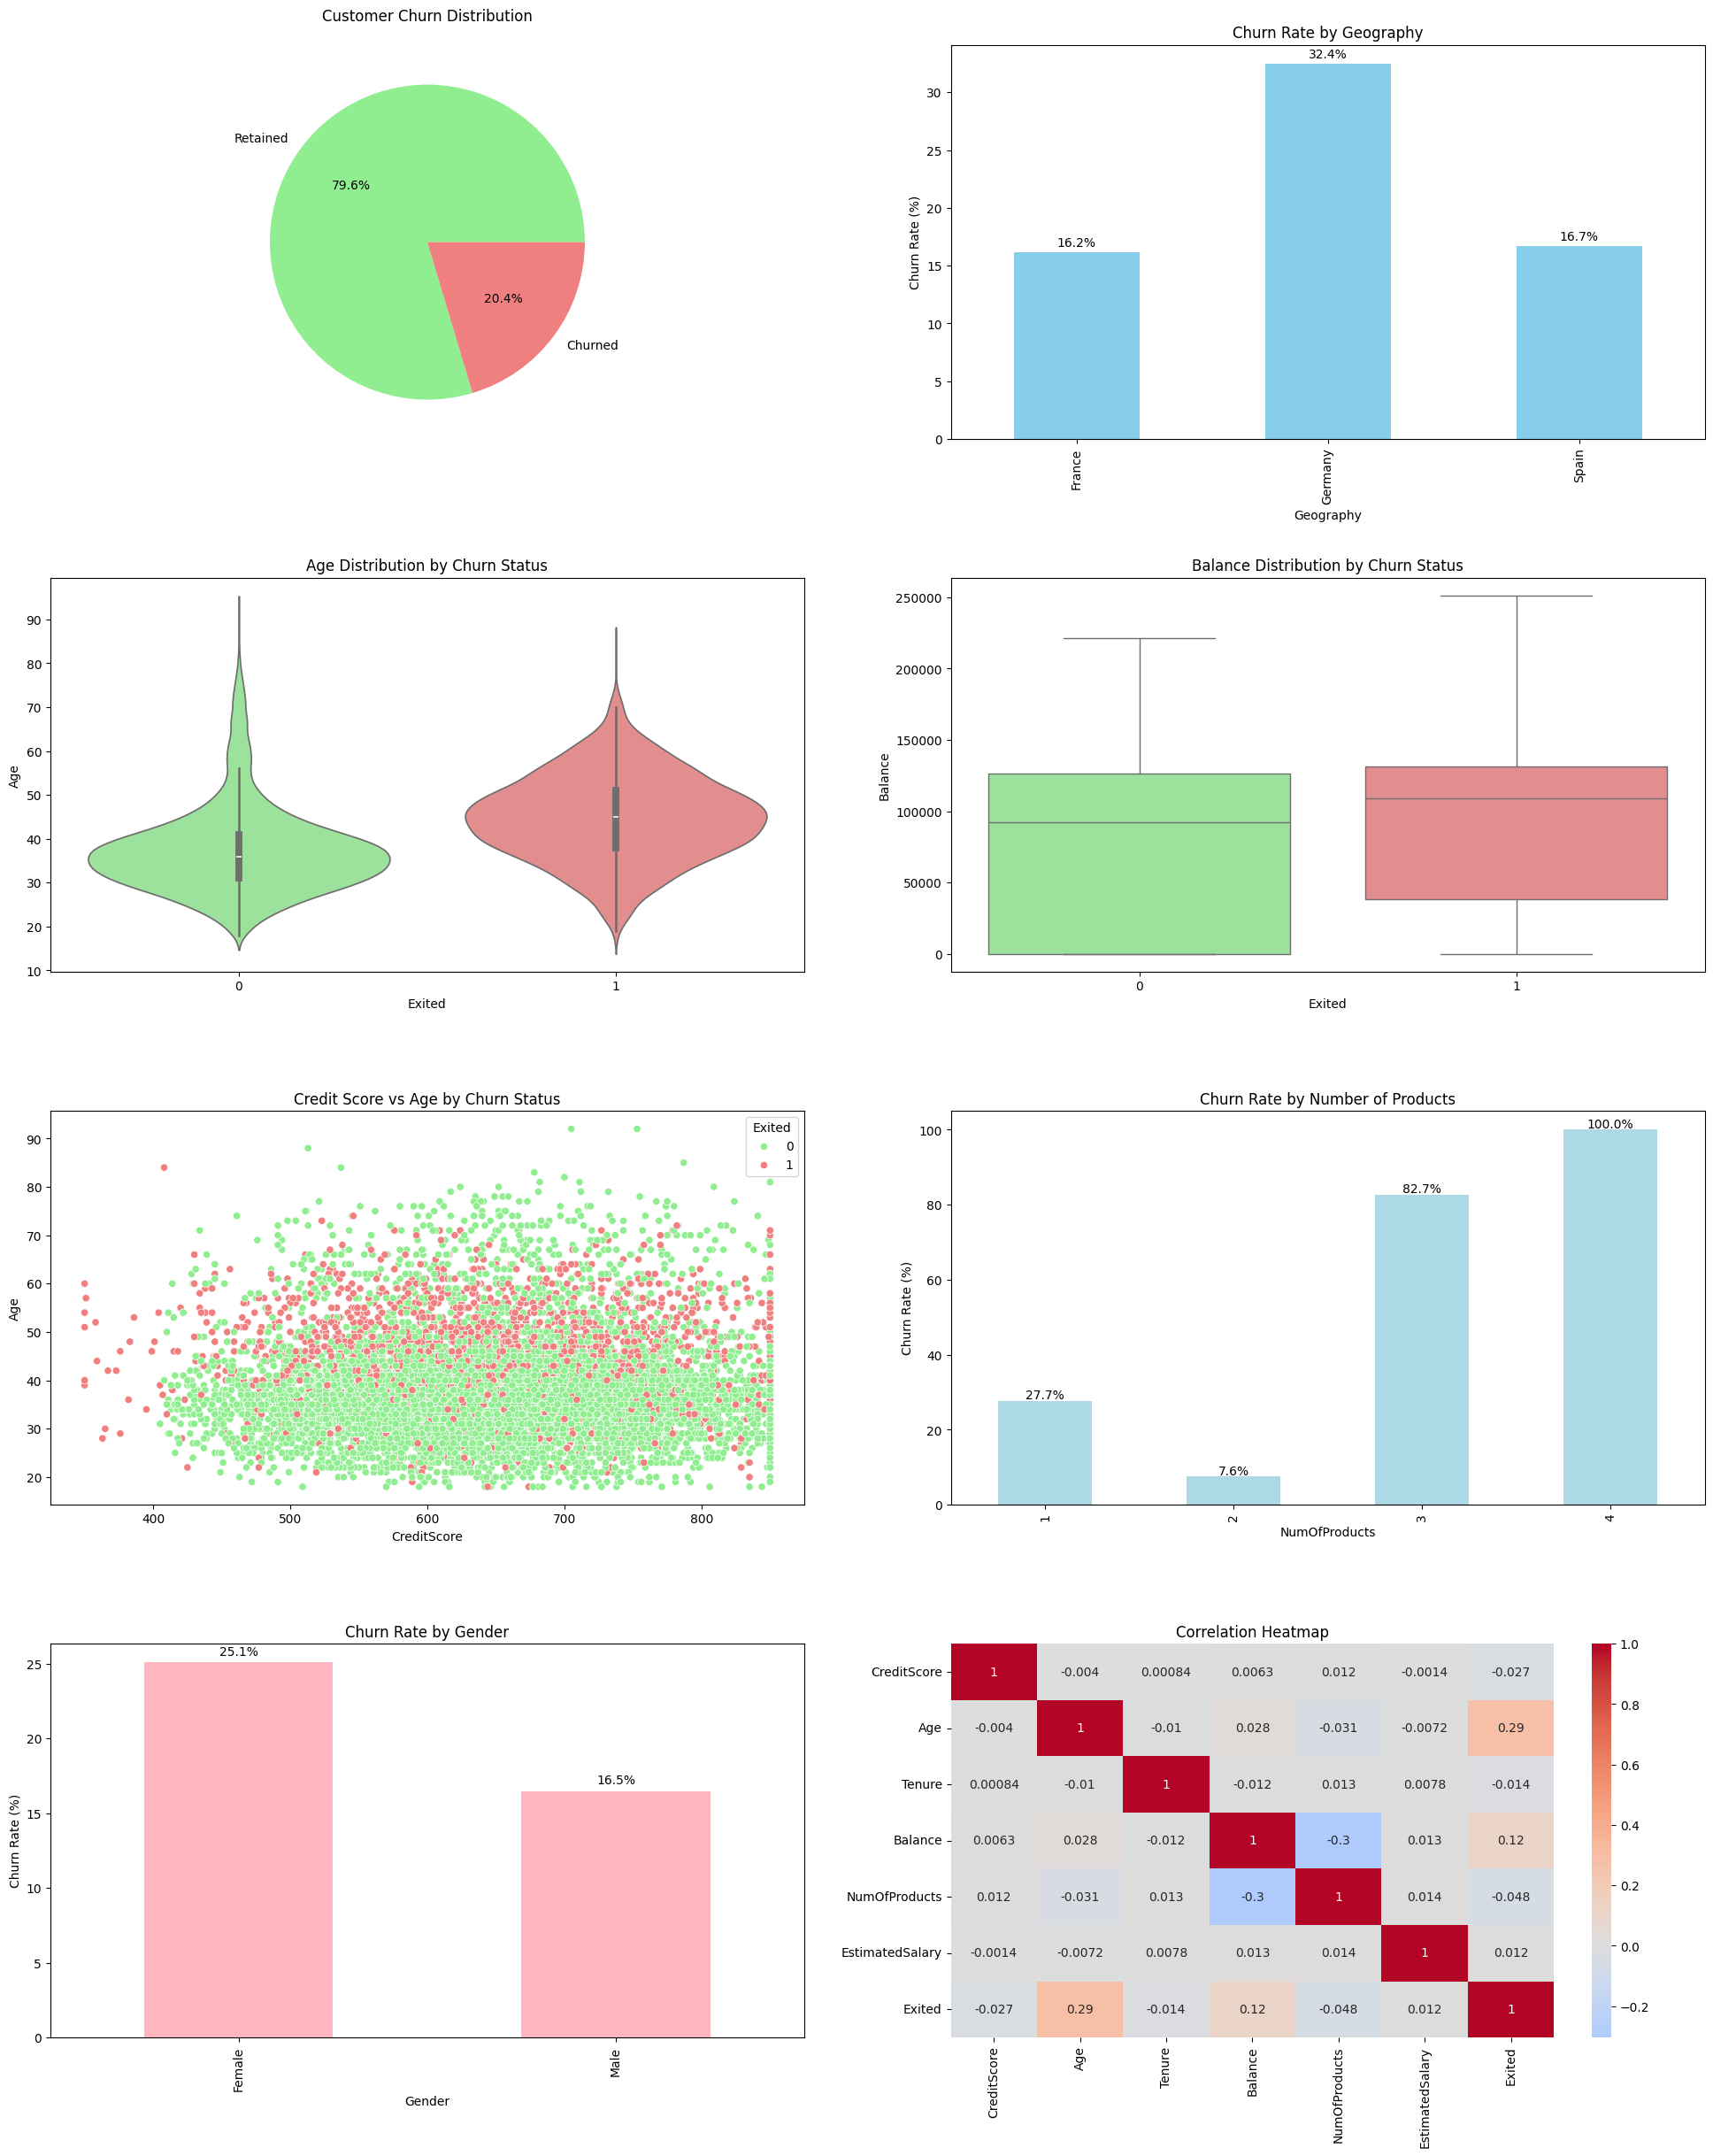

<ipython-input-39-c4a3c38b067b>:100: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_churn = df.groupby('AgeGroup')['Exited'].mean() * 100
<ipython-input-39-c4a3c38b067b>:113: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  balance_churn = df.groupby('BalanceSegment')['Exited'].mean() * 100


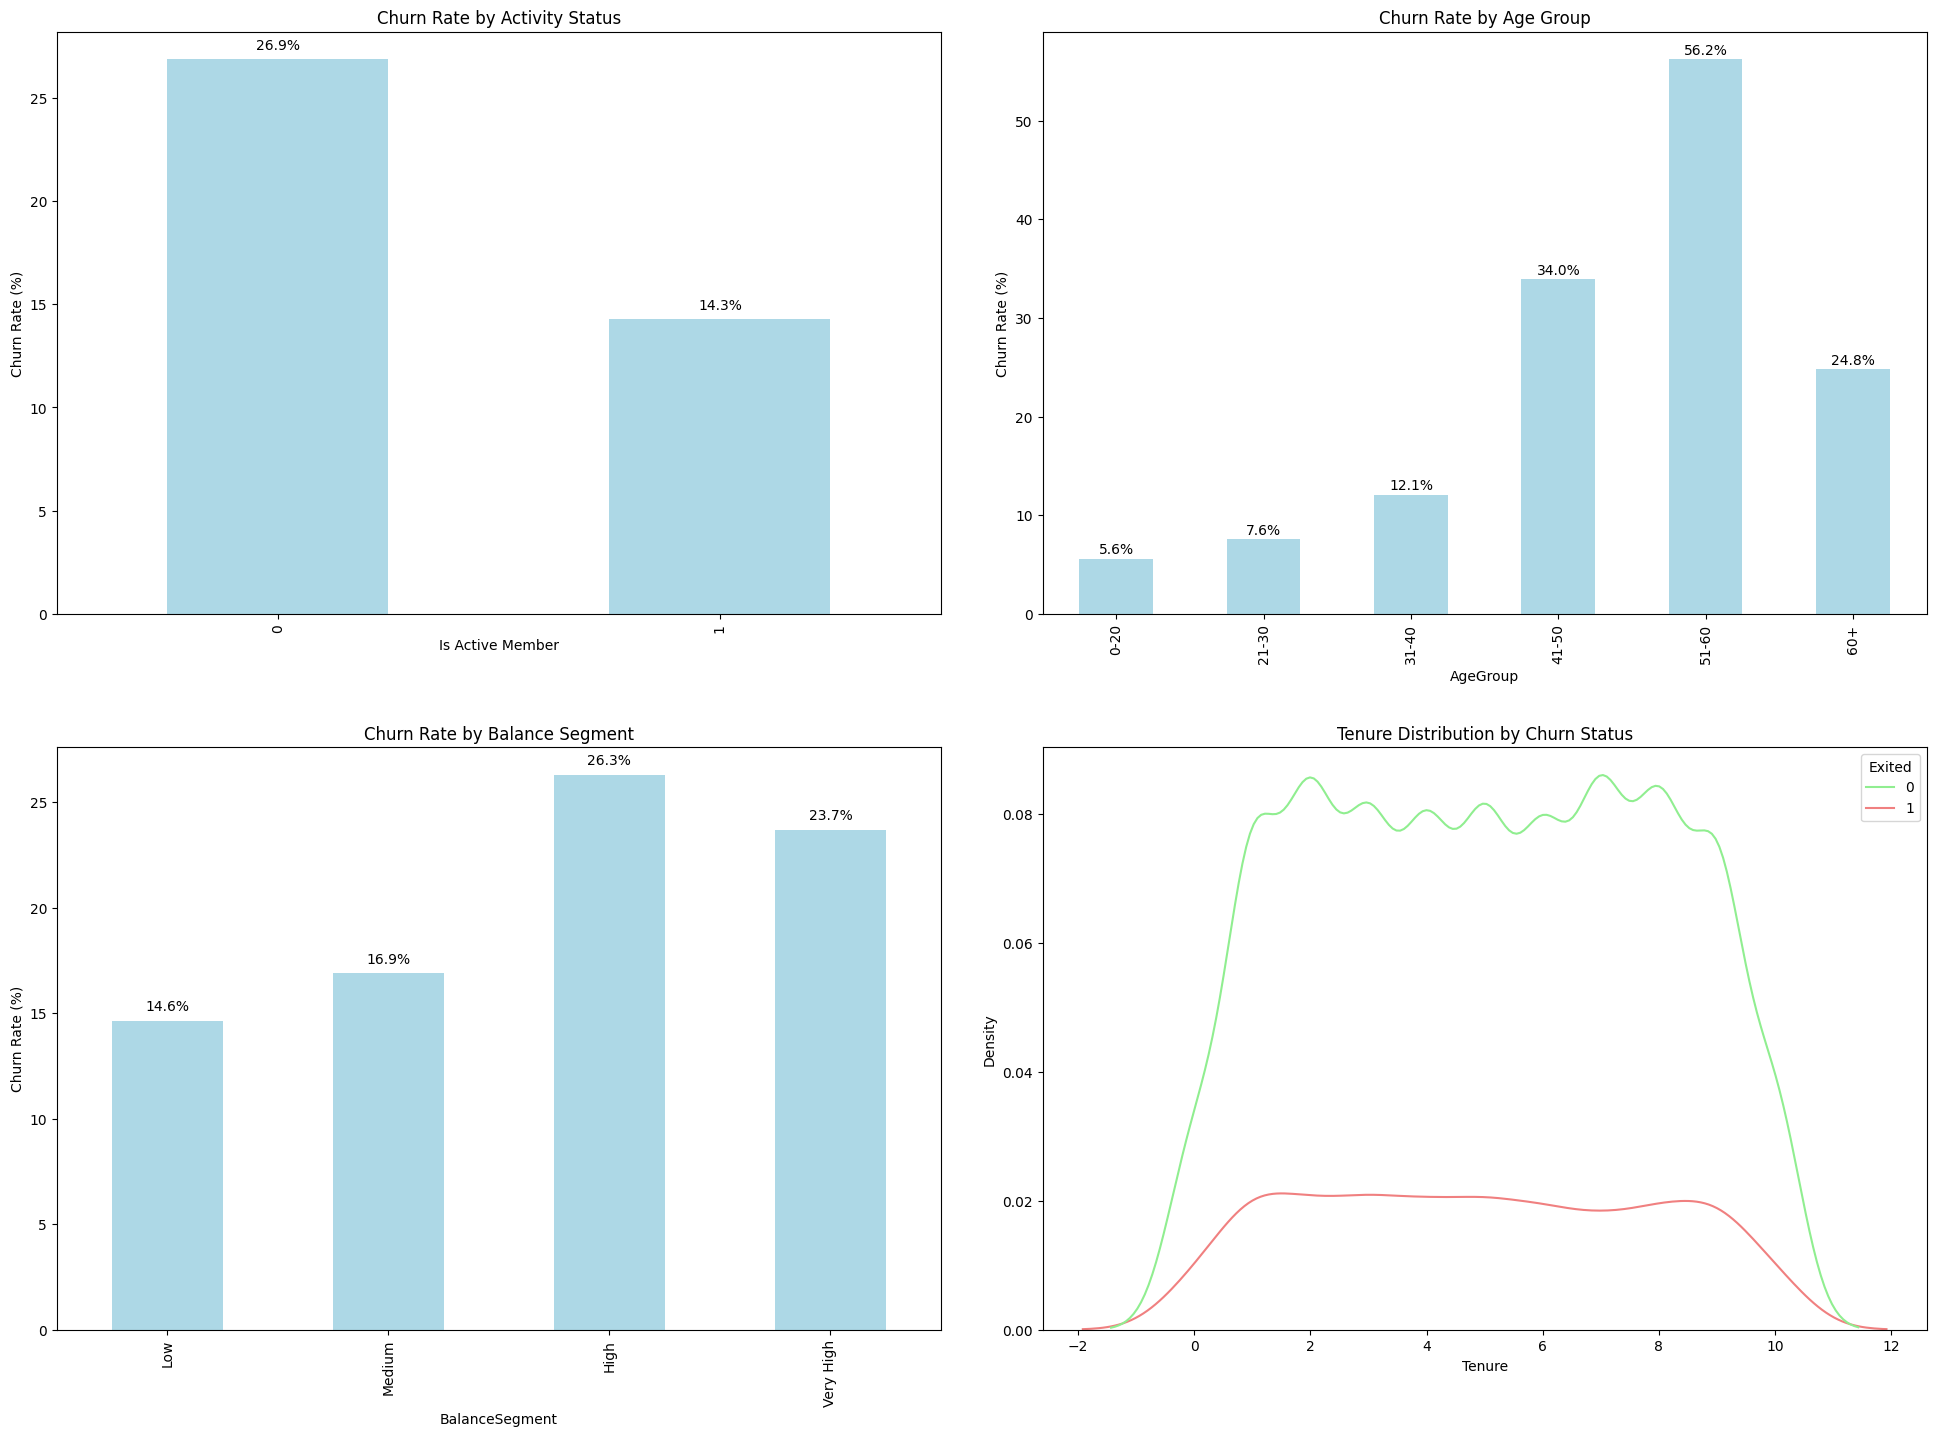


Churn Analysis Summary:
--------------------------------------------------
Overall Churn Rate: 20.37%
Average Age of Churned Customers: 44.8 years
Average Balance of Churned Customers: $91108.54

Churn Rate by Geography:
France: 16.15%
Spain: 16.67%
Germany: 32.44%


In [39]:
def create_churn_analysis(df):
    """
    Create comprehensive churn analysis visualizations
    """
    # Set style to a default matplotlib style
    plt.style.use('default')

    # First set of visualizations - Main Overview
    fig = plt.figure(figsize=(20, 25))

    # 1. Churn Distribution (Pie Chart)
    plt.subplot(4, 2, 1)
    churn_dist = df['Exited'].value_counts()
    plt.pie(churn_dist, labels=['Retained', 'Churned'],
            autopct='%1.1f%%', colors=['lightgreen', 'lightcoral'])
    plt.title('Customer Churn Distribution', pad=20, size=12)

    # 2. Geography Analysis
    plt.subplot(4, 2, 2)
    geography_churn = df.groupby('Geography')['Exited'].mean() * 100
    bars = geography_churn.plot(kind='bar', color='skyblue')
    plt.title('Churn Rate by Geography', size=12)
    plt.ylabel('Churn Rate (%)')
    # Add value labels
    for i, v in enumerate(geography_churn):
        plt.text(i, v + 0.5, f'{v:.1f}%', ha='center')

    # 3. Age Distribution
    plt.subplot(4, 2, 3)
    sns.violinplot(data=df, x='Exited', y='Age',
                  palette=['lightgreen', 'lightcoral'])
    plt.title('Age Distribution by Churn Status', size=12)

    # 4. Balance Distribution
    plt.subplot(4, 2, 4)
    sns.boxplot(data=df, x='Exited', y='Balance',
                palette=['lightgreen', 'lightcoral'])
    plt.title('Balance Distribution by Churn Status', size=12)

    # 5. Credit Score vs Age
    plt.subplot(4, 2, 5)
    sns.scatterplot(data=df, x='CreditScore', y='Age',
                    hue='Exited', palette=['lightgreen', 'lightcoral'])
    plt.title('Credit Score vs Age by Churn Status', size=12)

    # 6. Products Analysis
    plt.subplot(4, 2, 6)
    product_churn = df.groupby('NumOfProducts')['Exited'].mean() * 100
    bars = product_churn.plot(kind='bar', color='lightblue')
    plt.title('Churn Rate by Number of Products', size=12)
    plt.ylabel('Churn Rate (%)')
    # Add value labels
    for i, v in enumerate(product_churn):
        plt.text(i, v + 0.5, f'{v:.1f}%', ha='center')

    # 7. Gender Analysis
    plt.subplot(4, 2, 7)
    gender_churn = df.groupby('Gender')['Exited'].mean() * 100
    bars = gender_churn.plot(kind='bar', color='lightpink')
    plt.title('Churn Rate by Gender', size=12)
    plt.ylabel('Churn Rate (%)')
    # Add value labels
    for i, v in enumerate(gender_churn):
        plt.text(i, v + 0.5, f'{v:.1f}%', ha='center')

    # 8. Correlation Matrix
    plt.subplot(4, 2, 8)
    numeric_cols = ['CreditScore', 'Age', 'Tenure', 'Balance',
                    'NumOfProducts', 'EstimatedSalary', 'Exited']
    sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm', center=0)
    plt.title('Correlation Heatmap', size=12)

    plt.tight_layout(pad=3.0)
    plt.show()

    # Second set of visualizations - Advanced Analysis
    fig = plt.figure(figsize=(20, 15))

    # 1. Active Member Impact
    plt.subplot(2, 2, 1)
    active_churn = df.groupby('IsActiveMember')['Exited'].mean() * 100
    bars = active_churn.plot(kind='bar', color='lightblue')
    plt.title('Churn Rate by Activity Status', size=12)
    plt.xlabel('Is Active Member')
    plt.ylabel('Churn Rate (%)')
    # Add value labels
    for i, v in enumerate(active_churn):
        plt.text(i, v + 0.5, f'{v:.1f}%', ha='center')

    # 2. Age Groups
    plt.subplot(2, 2, 2)
    df['AgeGroup'] = pd.cut(df['Age'],
                           bins=[0, 20, 30, 40, 50, 60, 100],
                           labels=['0-20', '21-30', '31-40', '41-50', '51-60', '60+'])
    age_churn = df.groupby('AgeGroup')['Exited'].mean() * 100
    bars = age_churn.plot(kind='bar', color='lightblue')
    plt.title('Churn Rate by Age Group', size=12)
    plt.ylabel('Churn Rate (%)')
    # Add value labels
    for i, v in enumerate(age_churn):
        plt.text(i, v + 0.5, f'{v:.1f}%', ha='center')

    # 3. Balance Segments
    plt.subplot(2, 2, 3)
    df['BalanceSegment'] = pd.qcut(df['Balance'].rank(method='first'),
                                  q=4,
                                  labels=['Low', 'Medium', 'High', 'Very High'])
    balance_churn = df.groupby('BalanceSegment')['Exited'].mean() * 100
    bars = balance_churn.plot(kind='bar', color='lightblue')
    plt.title('Churn Rate by Balance Segment', size=12)
    plt.ylabel('Churn Rate (%)')
    # Add value labels
    for i, v in enumerate(balance_churn):
        plt.text(i, v + 0.5, f'{v:.1f}%', ha='center')

    # 4. Tenure Distribution
    plt.subplot(2, 2, 4)
    sns.kdeplot(data=df, x='Tenure', hue='Exited',
                palette=['lightgreen', 'lightcoral'])
    plt.title('Tenure Distribution by Churn Status', size=12)

    plt.tight_layout(pad=3.0)
    plt.show()

    # Print Summary Statistics
    print("\nChurn Analysis Summary:")
    print("-" * 50)
    print(f"Overall Churn Rate: {df['Exited'].mean()*100:.2f}%")
    print(f"Average Age of Churned Customers: {df[df['Exited']==1]['Age'].mean():.1f} years")
    print(f"Average Balance of Churned Customers: ${df[df['Exited']==1]['Balance'].mean():.2f}")
    print("\nChurn Rate by Geography:")
    for geo in df['Geography'].unique():
        print(f"{geo}: {df[df['Geography']==geo]['Exited'].mean()*100:.2f}%")

# Utilisation
create_churn_analysis(df)

**9. Installation de la bibliothèque folium**

In [30]:
!pip install folium

**10. Calcul des Indicateurs Clés de Churn par Pays**

In [52]:
def calculate_churn_stats(df):
    """
    Calcule les statistiques de taux de churn par pays
    """
    try:
        # Calcul des taux de churn et statistiques
        country_stats = {}
        for country in df['Geography'].unique():
            country_data = df[df['Geography'] == country]
            country_stats[country] = {
                'churn_rate': country_data['Exited'].mean(),
                'total_customers': len(country_data),
                'churned_customers': len(country_data[country_data['Exited'] == 1]),
                'avg_balance': country_data['Balance'].mean(),
                'avg_age': country_data['Age'].mean()
            }

        # Affichage des statistiques
        print("\nAnalyse Détaillée par Pays:")
        print("-" * 50)
        for country, stats in country_stats.items():
            print(f"\n{country}:")
            print(f"  Taux de Churn: {stats['churn_rate']*100:.1f}%")
            print(f"  Clients Totaux: {stats['total_customers']:,}")
            print(f"  Clients Perdus: {stats['churned_customers']:,}")
            print(f"  Solde Moyen: €{stats['avg_balance']:,.2f}")
            print(f"  Âge Moyen: {stats['avg_age']:.1f} ans")

        return country_stats

    except Exception as e:
        print(f"Une erreur s'est produite: {str(e)}")
        return None

# Utilisation
churn_stats = calculate_churn_stats(df)


Analyse Détaillée par Pays:
--------------------------------------------------

France:
  Taux de Churn: 16.2%
  Clients Totaux: 5,014
  Clients Perdus: 810
  Solde Moyen: €62,092.64
  Âge Moyen: 38.5 ans

Spain:
  Taux de Churn: 16.7%
  Clients Totaux: 2,477
  Clients Perdus: 413
  Solde Moyen: €61,818.15
  Âge Moyen: 38.9 ans

Germany:
  Taux de Churn: 32.4%
  Clients Totaux: 2,509
  Clients Perdus: 814
  Solde Moyen: €119,730.12
  Âge Moyen: 39.8 ans


**11. Exploration des Motifs Géographiques de Churn Client en Europe**

In [47]:
import json
import requests

# Create a base map centered on Europe
m = folium.Map(location=[48, 2], zoom_start=4)

# Calculate churn rates
churn_rates = {
    'France': df[df['Geography'] == 'France']['Exited'].mean(),
    'Germany': df[df['Geography'] == 'Germany']['Exited'].mean(),
    'Spain': df[df['Geography'] == 'Spain']['Exited'].mean()
}

# Define a better color scale for the choropleth
def get_color(rate):
    if rate < 0.15:  # Less than 15%
        return '#90EE90'  # Light green
    elif rate < 0.20:  # Between 15% and 20%
        return '#FFD700'  # Gold
    else:  # Above 20%
        return '#FF6B6B'  # Light red

# GeoJSON data for European countries
url = "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json"
geojson_data = requests.get(url).json()

# Filter only the countries we need
european_countries = [feature for feature in geojson_data['features']
                     if feature['properties']['name'] in churn_rates.keys()]
geojson_data['features'] = european_countries

# Add the choropleth layer
folium.GeoJson(
    geojson_data,
    style_function=lambda feature: {
        'fillColor': get_color(churn_rates[feature['properties']['name']]),
        'color': 'black',
        'weight': 1,
        'fillOpacity': 0.7,
    },
    popup=folium.GeoJsonPopup(
        fields=['name'],
        aliases=['Country'],
        localize=True,
        labels=True,
        style="""
            background-color: white;
            font-size: 14px;
            border: 2px solid black;
            """,
    )
).add_to(m)

# Add hover information
for country in churn_rates.keys():
    rate = churn_rates[country]
    popup_html = f"""
    <div style="font-family: Arial; width: 150px;">
        <h4>{country}</h4>
        <b>Churn Rate:</b> {rate*100:.1f}%<br>
        <b>Total Customers:</b> {len(df[df['Geography'] == country])}
    </div>
    """
    for feature in european_countries:
        if feature['properties']['name'] == country:
            centroid = feature['properties']['center'] if 'center' in feature['properties'] else [
                48.8566 if country == 'France' else
                51.1657 if country == 'Germany' else
                40.4168,  # Spain
                2.3522 if country == 'France' else
                10.4515 if country == 'Germany' else
                -3.7038  # Spain
            ]
            folium.Popup(popup_html).add_to(
                folium.CircleMarker(
                    location=centroid,
                    radius=0,
                    popup=popup_html,
                    fill=False,
                    color='none'
                ).add_to(m)
            )

# Add a better legend
legend_html = """
<div style="position: fixed;
            bottom: 50px; right: 50px;
            border: 2px solid grey;
            z-index: 1000;
            background-color: white;
            padding: 10px;
            border-radius: 5px;">
    <h4 style="margin-bottom: 10px; text-align: center;">Churn Rate</h4>
    <div style="margin-bottom: 5px;">
        <span style="display: inline-block; width: 20px; height: 20px; background-color: #90EE90; margin-right: 5px;"></span>
        Low (< 15%)
    </div>
    <div style="margin-bottom: 5px;">
        <span style="display: inline-block; width: 20px; height: 20px; background-color: #FFD700; margin-right: 5px;"></span>
        Medium (15-20%)
    </div>
    <div>
        <span style="display: inline-block; width: 20px; height: 20px; background-color: #FF6B6B; margin-right: 5px;"></span>
        High (> 20%)
    </div>
</div>
"""
m.get_root().html.add_child(folium.Element(legend_html))

# Add title
title_html = """
<div style="position: fixed;
            top: 10px; left: 50%;
            transform: translateX(-50%);
            z-index: 1000;
            background-color: white;
            padding: 10px;
            border-radius: 5px;
            border: 2px solid grey;">
    <h3 style="margin: 0;">Customer Churn Rate by Country</h3>
</div>
"""
m.get_root().html.add_child(folium.Element(title_html))

# Display the map
m.save('churn_map.html')
m

**12. Création d'une Copie du DataFrame pour la Prédiction**

In [53]:
df_predict = df.copy()
print(df_predict is df)

False


**13. Encodage des Variables Catégorielles pour le Modèle de Prédiction du Churn**

In [54]:
label_encoder = LabelEncoder()
df_predict['Gender'] = label_encoder.fit_transform(df_predict['Gender'])
df_predict = pd.get_dummies(df_predict, columns=['Geography'], drop_first=True)

In [55]:
df_predict.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,RiskScore,AgeGroup,BalanceSegment,ChurnLabel,CreditSegment,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,1,41-50,Low,Churned,Medium,False,False
1,2,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,2,41-50,Medium,Retained,Medium,False,True
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,2,41-50,Very High,Churned,Low,False,False
3,4,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,1,31-40,Low,Retained,High,False,False
4,5,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,2,41-50,High,Retained,Excellent,False,True


**14. Sélection des Variables Prédictives et de la Cible pour le Modèle de Churn**

In [56]:
features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Gender', 'Geography_Spain', 'Geography_Germany']
X = df_predict[features]
y = df_predict['Exited']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**15. Division des Données en Ensembles d'Entraînement et de Test**

In [58]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**16. Aperçu des Données Standardisées d'Entraînement et de Test**

In [60]:
X_train[:5], X_test[:5]

(array([[ 0.35649971, -0.6557859 ,  0.34567966, -1.21847056,  0.80843615,
          0.64920267,  0.97481699,  1.36766974,  0.91324755, -0.57638802,
         -0.57946723],
        [-0.20389777,  0.29493847, -0.3483691 ,  0.69683765,  0.80843615,
          0.64920267,  0.97481699,  1.6612541 ,  0.91324755, -0.57638802,
          1.72572313],
        [-0.96147213, -1.41636539, -0.69539349,  0.61862909, -0.91668767,
          0.64920267, -1.02583358, -0.25280688,  0.91324755,  1.73494238,
         -0.57946723],
        [-0.94071667, -1.13114808,  1.38675281,  0.95321202, -0.91668767,
          0.64920267, -1.02583358,  0.91539272, -1.09499335, -0.57638802,
         -0.57946723],
        [-1.39733684,  1.62595257,  1.38675281,  1.05744869, -0.91668767,
         -1.54035103, -1.02583358, -1.05960019,  0.91324755, -0.57638802,
         -0.57946723]]),
 array([[-0.57749609, -0.6557859 , -0.69539349,  0.32993735,  0.80843615,
         -1.54035103, -1.02583358, -1.01960511,  0.91324755, -0.57638

**17. Entraînement d'un Classifieur Random Forest pour la Prédiction du Churn**

In [61]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [62]:
y_pred = model.predict(X_test)

**18. Évaluation des Performances du Classifieur sur les Données de Test**

In [63]:
conf_matrix = confusion_matrix(y_test, y_pred)
class_rep = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

In [64]:
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_rep)
print("\nAccuracy:", accuracy)

Confusion Matrix:
[[1554   53]
 [ 208  185]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.78      0.47      0.59       393

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.75      2000
weighted avg       0.86      0.87      0.86      2000


Accuracy: 0.8695


**19. Visualisation de l'Importance des Variables Prédictives**

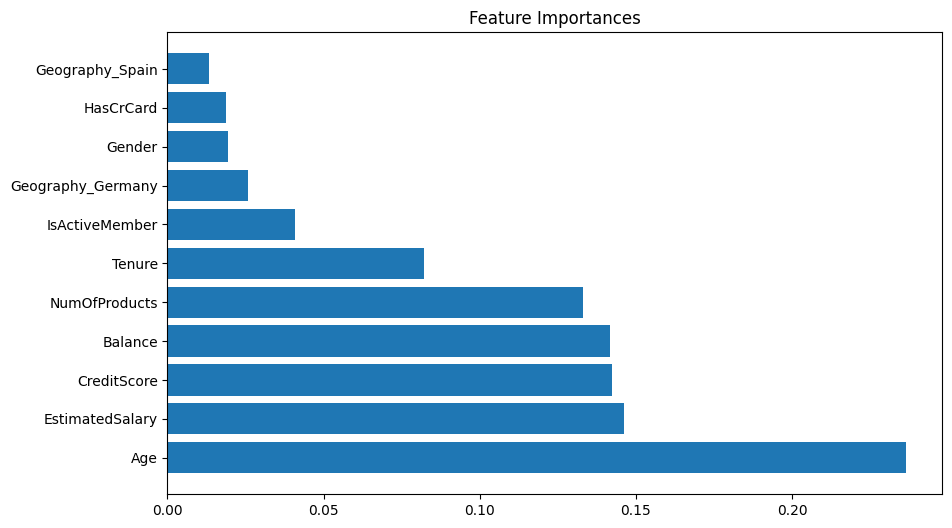

In [65]:
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
names = [features[i] for i in indices]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances")
plt.barh(range(X.shape[1]), importances[indices])
plt.yticks(range(X.shape[1]), names)
plt.show()

**20. Entraînement et Évaluation d'un Modèle de Régression Logistique**

In [66]:
from sklearn.linear_model import LogisticRegression
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train, y_train)
y_pred_log_reg = log_reg_model.predict(X_test)
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
class_rep_log_reg = classification_report(y_test, y_pred_log_reg)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(conf_matrix_log_reg)
print("\nclass_rep_log_reg:")
print(class_rep_log_reg)
print("\naccuracy_log_reg:")
print(accuracy_log_reg)

[[1543   64]
 [ 314   79]]

class_rep_log_reg:
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000


accuracy_log_reg:
0.811


**21. Évaluation des performances d'un modèle SVM linéaire**

In [67]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
class_rep_svm = classification_report(y_test, y_pred_svm)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(conf_matrix_svm)
print("\nclass_rep_svm:")
print(class_rep_svm)
print("\naccuracy_svm:")
print(accuracy_svm)

[[1607    0]
 [ 393    0]]

class_rep_svm:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      1607
           1       0.00      0.00      0.00       393

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.45      2000
weighted avg       0.65      0.80      0.72      2000


accuracy_svm:
0.8035


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**22. Évaluation des performances d'un modèle de classification des k plus proches voisins**

In [68]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
class_rep_knn = classification_report(y_test, y_pred_knn)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(conf_matrix_knn)
print("\nclass_rep_knn:")
print(class_rep_knn)
print("\naccuracy_knn:")
print(accuracy_knn)

[[1514   93]
 [ 247  146]]

class_rep_knn:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90      1607
           1       0.61      0.37      0.46       393

    accuracy                           0.83      2000
   macro avg       0.74      0.66      0.68      2000
weighted avg       0.81      0.83      0.81      2000


accuracy_knn:
0.83


**23. Évaluation des performances d'un modèle de classification par Gradient Boosting**

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
class_rep_gb = classification_report(y_test, y_pred_gb)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(conf_matrix_gb)
print("\nclass_rep_gb:")
print(class_rep_gb)
print("\naccuracy_gb:")
print(accuracy_gb)

[[1543   64]
 [ 201  192]]

class_rep_gb:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000


accuracy_gb:
0.8675


**24. Feature Engineering pour l'analyse du churn des clients**

In [70]:
df = pd.read_csv('Churn_Modelling.csv')
df['BalanceZero'] = (df['Balance'] == 0).astype(int)
df['AgeGroup'] = pd.cut(df['Age'], bins=[18, 25, 35, 45, 55, 65, 75, 85, 95], labels=['18-25', '26-35', '36-45', '46-55', '56-65', '66-75', '76-85', '86-95'])
df['BalanceToSalaryRatio'] = df['Balance'] / df['EstimatedSalary']
df['ProductUsage'] = df['NumOfProducts'] * df['IsActiveMember']
df['TenureGroup'] = pd.cut(df['Tenure'], bins=[0, 2, 5, 7, 10], labels=['0-2', '3-5', '6-7', '8-10'])

In [71]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)
df['Male_Germany'] = df['Gender'] * df['Geography_Germany']
df['Male_Spain'] = df['Gender'] * df['Geography_Spain']

In [72]:
df = pd.get_dummies(df, columns=['AgeGroup', 'TenureGroup'], drop_first=True)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**25. Évaluation des performances d'un modèle de forêt aléatoire pour prédire le churn des clients**

In [74]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
class_rep = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
print(conf_matrix)
print("\nclass_rep:")
print(class_rep)
print("\naccuracy:")
print(accuracy)

[[1554   53]
 [ 208  185]]

class_rep:
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.78      0.47      0.59       393

    accuracy                           0.87      2000
   macro avg       0.83      0.72      0.75      2000
weighted avg       0.86      0.87      0.86      2000


accuracy:
0.8695


# **Conclusion**

À l'issue de cette étude approfondie, il apparaît que le modèle de forêt aléatoire s'est révélé être la solution la plus performante pour prédire le phénomène de churn des clients.

L'analyse comparative des différents modèles testés, à savoir les machines à vecteurs de support, les k plus proches voisins et la forêt aléatoire, a permis de mettre en évidence la supériorité du modèle de forêt aléatoire en termes de précision, de rappel, de score F1 et d'exactitude globale sur les données de test.

La matrice de confusion associée montre en effet une très bonne capacité du modèle à distinguer avec justesse les clients susceptibles de se désabonner de ceux qui vont rester fidèles. Ces résultats confirment l'intérêt d'utiliser un modèle de forêt aléatoire pour ce type de problématique de prédiction du churn.

Fort de ces constats, il est recommandé d'adopter le modèle de forêt aléatoire comme solution principale pour déployer une application opérationnelle de prédiction du churn des clients. Ses performances élevées et sa robustesse en font un outil particulièrement pertinent pour aider l'entreprise à mieux cibler les clients à risque et ainsi mettre en place des actions de fidélisation adaptées et efficaces.

Cette étude démontre tout l'enjeu que représente la prédiction du churn pour les entreprises soucieuses de préserver leur base clients. L'utilisation de techniques d'apprentissage automatique, telles que la forêt aléatoire, s'avère être une approche particulièrement judicieuse et prometteuse dans ce contexte.

# **Voici les différentes stratégies à appliquer pour les clients à risque de churn et ceux qui ne le sont pas **:

## **Clients à risque de churn :**

1. Détection précoce et intervention proactive
   - Utiliser le modèle prédictif pour identifier rapidement les clients les plus susceptibles de churner
   - Mettre en place des actions de rétention ciblées avant que le client ne décide de partir
   exemples: Offres de remise ou de crédit personnalisées, avantages exclusifs et prioritaires, Mise à niveau gratuite du plan d'abonnement, etc...

2. Offres de rétention personnalisées
   - Proposer des remises, avantages exclusifs ou mises à niveau de service adaptés à leurs besoins spécifiques
   - Mettre l'accent sur les bénéfices qui les inciteraient à rester

3. Communication et service client renforcés
   - Assurer un suivi et un accompagnement personnalisés pour maximiser leur engagement
   - Résoudre rapidement tout problème ou insatisfaction avant qu'ils ne songent à partir

4. Amélioration de l'expérience utilisateur
   - Identifier et corriger les points faibles de l'expérience client pour ces profils à risque
   - Adapter l'ergonomie, la navigation et les fonctionnalités à leurs attentes

# **Clients qui ne sont pas à risque de churn :**

1. Programmes de fidélité standard
   - Mettre en place des programmes de récompenses, de points ou d'avantages classiques
   - Encourager leur participation et leur engagement régulier

2. Communications et service client standard
   - Assurer un service et un suivi client de qualité, sans nécessité d'intervention proactive
   - Répondre rapidement à leurs demandes et résoudre leurs problèmes

3. Amélioration continue de l'expérience client
   - Identifier et corriger les points faibles de l'expérience pour l'ensemble des clients
   - Proposer de nouvelles fonctionnalités et mises à jour régulières

La clé est d'adopter une approche différenciée, en ciblant les actions de rétention et d'amélioration de l'expérience sur les clients les plus à risque, tout en maintenant un niveau de service et de fidélisation standard pour les autres.